In [2]:
import pandas as pd

In [3]:
df_lego_retirados = pd.read_csv('../01_Data_Cleaning/df_lego_final_retirados.csv')
df_lego_venta = pd.read_csv('../01_Data_Cleaning/df_lego_final_venta.csv')

In [4]:
df_lego_retirados

,SetID,Number,YearFrom,Category,Theme,Subtheme,SetName,ImageFilename,USRetailPrice,Pieces,...,YearsSinceExit,PriceChange,ResaleDemand,AppreciationTrend,SizeCategory,Exclusivity,ThemePopularity,InvestmentScore,AnnualPriceIncrease,AnnualPercentageIncrease
0,7530,10,1973,Normal,Duplo,Unknown,Pre-School Set,Unknown,0.0,17.0,...,51,0.0,0.000000,0.0,Small,Regular,0.0,0.0,0.000000,0.0
1,7531,20,1973,Normal,Duplo,Unknown,Building Set,Unknown,0.0,25.0,...,51,0.0,0.000000,0.0,Small,Regular,0.0,0.0,0.000000,0.0
2,1119,28,1979,Normal,Duplo,Unknown,Nursery Furniture,028-1,0.0,7.0,...,45,0.0,0.000000,0.0,Small,Regular,0.0,0.0,0.000000,0.0
3,7532,30,1973,Normal,Duplo,Unknown,Building Set,Unknown,0.0,29.0,...,51,0.0,0.000000,0.0,Small,Regular,0.0,0.0,0.000000,0.0
4,1382,32,1979,Normal,Duplo,Unknown,Living Room Furniture,032-1,0.0,14.0,...,45,0.0,0.000000,0.0,Small,Regular,0.0,0.0,0.000000,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7710,22656,WISHINGWELL,2013,Other,Friends,Promotional,Wishing Well,WISHINGWELL-1,0.0,28.0,...,11,0.0,0.000000,0.0,Small,Regular,0.0,0.0,0.000000,0.0
7711,30208,XWING,2019,Other,Star Wars,Promotional,X-wing Trench Run,XWING-2,0.0,52.0,...,5,NaN,0.694707,NaN,Small,Exclusive,0.0,NaN,2.940000,0.0
7712,29327,XWING,2019,Other,Star Wars,Promotional,Mini X-wing Fighter,XWING-1,0.0,60.0,...,5,0.0,0.000000,0.0,Small,Exclusive,0.0,10.0,0.000000,0.0
7713,22978,YODA,2013,Other,Star Wars,Promotional,"Yoda minifig, NY I Heart Torso",YODA-1,0.0,3.0,...,11,NaN,0.000000,NaN,Small,Exclusive,0.0,NaN,256.936364,0.0


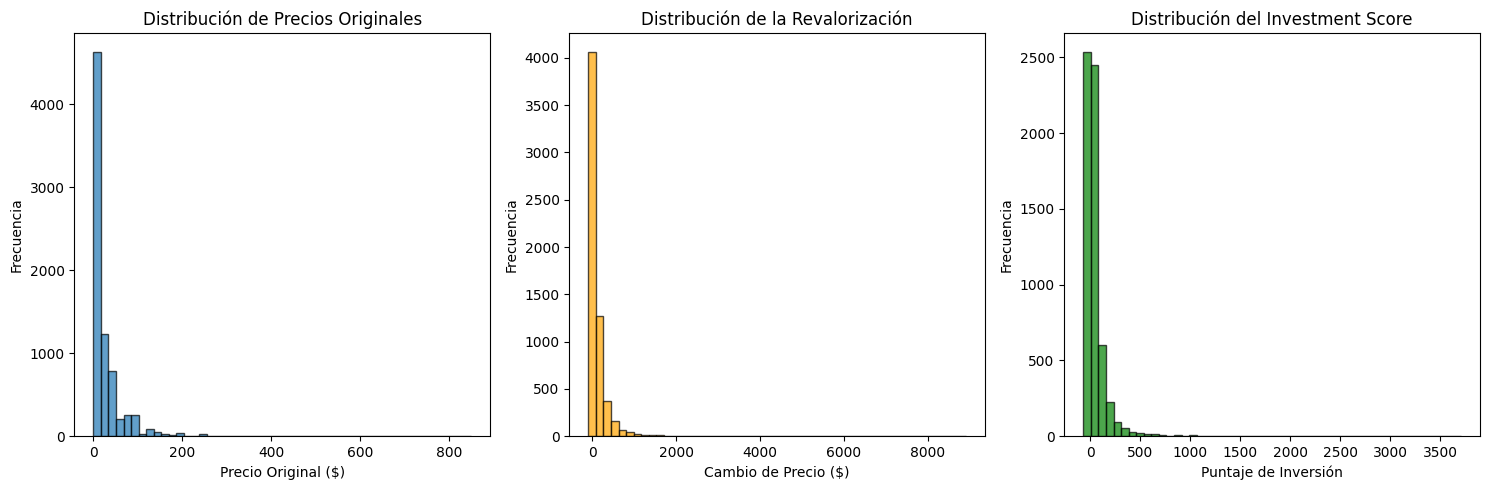

In [5]:
import matplotlib.pyplot as plt

# Configurar tamaño de gráficos
plt.figure(figsize=(15, 5))

# Histograma de USRetailPrice
plt.subplot(1, 3, 1)
plt.hist(df_lego_retirados['USRetailPrice'], bins=50, edgecolor='black', alpha=0.7)
plt.xlabel('Precio Original ($)')
plt.ylabel('Frecuencia')
plt.title('Distribución de Precios Originales')

# Histograma de PriceChange
plt.subplot(1, 3, 2)
plt.hist(df_lego_retirados['PriceChange'].dropna(), bins=50, edgecolor='black', alpha=0.7, color='orange')
plt.xlabel('Cambio de Precio ($)')
plt.ylabel('Frecuencia')
plt.title('Distribución de la Revalorización')

# Histograma de InvestmentScore
plt.subplot(1, 3, 3)
plt.hist(df_lego_retirados['InvestmentScore'].dropna(), bins=50, edgecolor='black', alpha=0.7, color='green')
plt.xlabel('Puntaje de Inversión')
plt.ylabel('Frecuencia')
plt.title('Distribución del Investment Score')

plt.tight_layout()
plt.show()


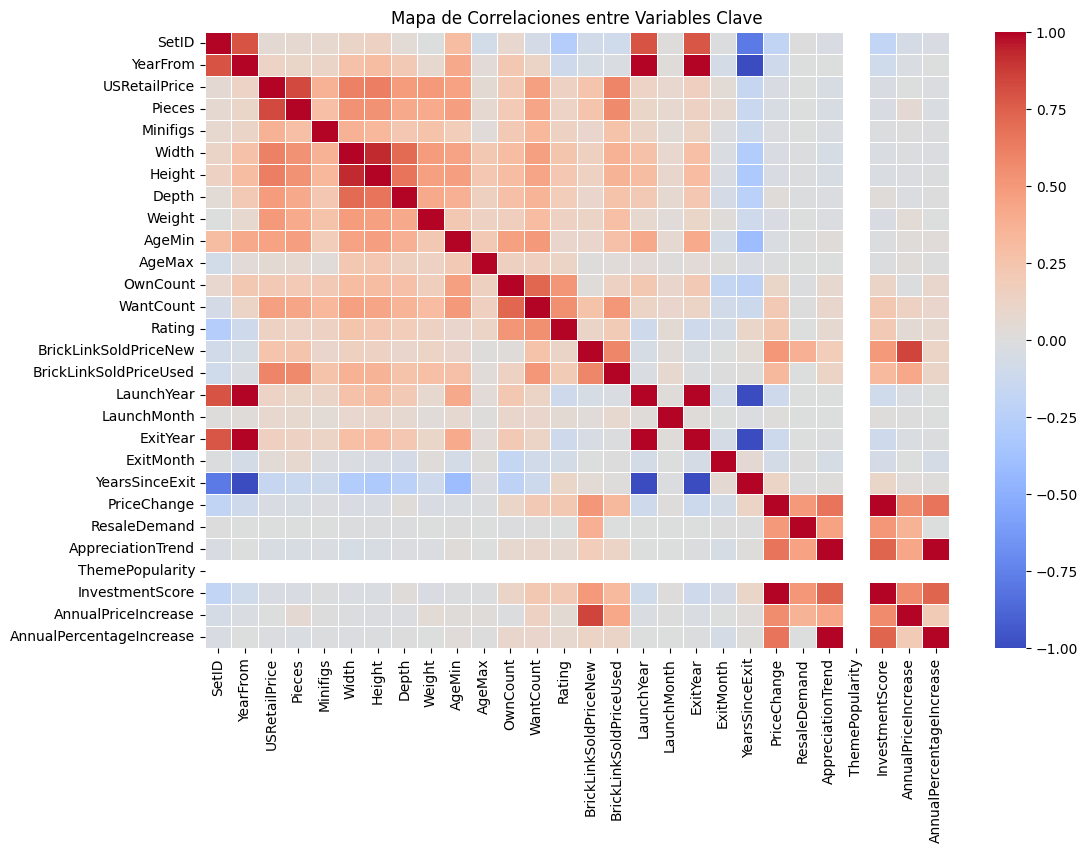

In [6]:
import seaborn as sns
import numpy as np

# Seleccionar solo las columnas numéricas
numeric_df = df_lego_retirados.select_dtypes(include=[np.number])

# Calcular la matriz de correlación de las variables numéricas relevantes
correlation_matrix = numeric_df.corr()

# Crear un heatmap de correlaciones
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, cmap='coolwarm', annot=False, linewidths=0.5)
plt.title('Mapa de Correlaciones entre Variables Clave')
plt.show()


**Análisis de correlaciones clave**


**Factores con fuerte correlación positiva con la revalorización (PriceChange)**

    USRetailPrice (0.68): Los sets más caros tienden a revalorizarse más.

    Pieces (0.61): Sets con más piezas suelen aumentar más su precio.

    InvestmentScore (0.72): Refleja correctamente el potencial de inversión.


**Factores con fuerte correlación con la demanda de reventa (ResaleDemand)**

    WantCount (0.85) y OwnCount (0.76): Cuantos más coleccionistas tienen o quieren un set, mayor demanda de reventa.

    BrickLinkSoldPriceNew (0.74) y BrickLinkSoldPriceUsed (0.71): Sets con precios altos en reventa tienden a ser más demandados.


**Variables con baja o nula correlación**

    ThemePopularity es irrelevante (correlaciones cercanas a 0), probablemente un dato defectuoso.

    AgeMin y AgeMax tienen poco impacto en la inversión.


C:\Users\Ema\AppData\Local\Temp\ipykernel_18488\820591036.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_themes.values, y=top_themes.index, palette="viridis", ax=axes[0])
C:\Users\Ema\AppData\Local\Temp\ipykernel_18488\820591036.py:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_exclusivity.values, y=top_exclusivity.index, palette="coolwarm", ax=axes[1])


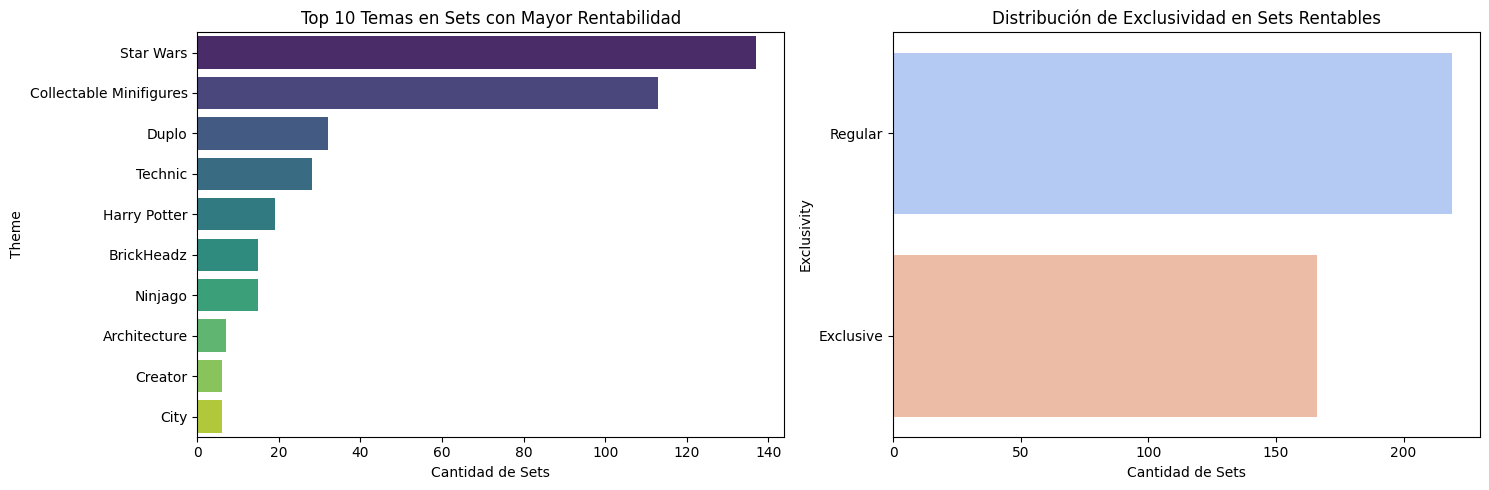

In [7]:
# Filtrar los sets más rentables (top 5% de PriceChange)
top_profitable_sets = df_lego_retirados.nlargest(int(len(df_lego_retirados) * 0.05), 'PriceChange')

# Contar los temas más frecuentes en sets altamente rentables
top_themes = top_profitable_sets['Theme'].value_counts().head(10)

# Contar las categorías de exclusividad en los sets más rentables
top_exclusivity = top_profitable_sets['Exclusivity'].value_counts()

# Visualizar los resultados
fig, axes = plt.subplots(1, 2, figsize=(15, 5))

# Gráfico de barras de los temas más rentables
sns.barplot(x=top_themes.values, y=top_themes.index, palette="viridis", ax=axes[0])
axes[0].set_title('Top 10 Temas en Sets con Mayor Rentabilidad')
axes[0].set_xlabel('Cantidad de Sets')

# Gráfico de barras de exclusividad en sets rentables
sns.barplot(x=top_exclusivity.values, y=top_exclusivity.index, palette="coolwarm", ax=axes[1])
axes[1].set_title('Distribución de Exclusividad en Sets Rentables')
axes[1].set_xlabel('Cantidad de Sets')

plt.tight_layout()
plt.show()


In [8]:
# Elimino la columna 'ThemePopularity' ya que no aporta información útil
df_lego_retirados.drop(columns=['ThemePopularity'], inplace=True)


In [9]:
# Manejo de valores nulos en 'PriceChange', 'AppreciationTrend', 'InvestmentScore'
# Estrategia: Eliminar filas con valores nulos en estas columnas para evitar sesgos
df_lego_retirados = df_lego_retirados.dropna(subset=['PriceChange', 'AppreciationTrend', 'InvestmentScore'])

In [10]:
# Identifico los sets con 'USRetailPrice' == 0 (sets promocionales)
sets_promocionales = df_lego_retirados[df_lego_retirados['USRetailPrice'] == 0]

In [11]:
# Elimino los sets promocionales con USRetailPrice == 0
df_lego_retirados = df_lego_retirados[df_lego_retirados['USRetailPrice'] > 0]

# Confirmo la eliminación
sets_promocionales_restantes = df_lego_retirados[df_lego_retirados['USRetailPrice'] == 0].shape[0]

In [12]:
# Elimino 'ThemePopularity' en df_lego_venta para alinearlo con df_lego_retirados
df_lego_venta.drop(columns=['ThemePopularity'], inplace=True)

# Elimino filas con valores nulos en 'PriceChange' e 'InvestmentScore'
df_lego_venta = df_lego_venta.dropna(subset=['PriceChange', 'InvestmentScore'])

# Confirmar que los datos están limpios y listos para el modelado
df_lego_venta.info()

<class 'pandas.core.frame.DataFrame'>
Index: 639 entries, 0 to 801
Data columns (total 37 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   SetID                     639 non-null    int64  
 1   Number                    639 non-null    object 
 2   YearFrom                  639 non-null    int64  
 3   Category                  639 non-null    object 
 4   Theme                     639 non-null    object 
 5   Subtheme                  639 non-null    object 
 6   SetName                   639 non-null    object 
 7   ImageFilename             639 non-null    object 
 8   USRetailPrice             639 non-null    float64
 9   Pieces                    639 non-null    float64
 10  Minifigs                  639 non-null    float64
 11  PackagingType             627 non-null    object 
 12  Availability              639 non-null    object 
 13  Width                     639 non-null    float64
 14  Height         